In [166]:
import json
import os
import sys
from glob import glob
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns

from tools.attack import ATTACKS, MODELS, test

In [115]:
def open_config(file):
    with open(file) as f:
        config =  json.load(f)

    return config

In [116]:
configs = list(map(open_config, glob('configs/*.json')))
weights = (((glob('models/*.pt'))))


In [117]:
methods = {
    'deepfool': [0.02, 50],
    'simba': [0.05, 500],
    'bim': [0.02, 50]
    }

dfs = []
for method in methods:
    results = {}
    for i in range(len(configs)):
        iters = np.array(test(configs[i], weights[i], method, *methods[method]))
        model_name = configs[i]['model']['name']
        results[model_name] = iters
    dfs.append(pd.DataFrame(results))


100%|██████████| 20/20 [00:00<00:00, 43.38it/s]


In [131]:
dfs[0]['cnn']

0     3
1     3
2     5
3     7
4     8
5     7
6     7
7     5
8     5
9     4
10    6
11    5
12    4
13    5
14    5
15    6
16    4
17    4
18    4
19    5
Name: cnn, dtype: int32

In [128]:
import scipy

In [135]:
dfs[0]['cnn'].values

array([3, 3, 5, 7, 8, 7, 7, 5, 5, 4, 6, 5, 4, 5, 5, 6, 4, 4, 4, 5])

In [144]:
res = scipy.stats.bootstrap([dfs[1]['cnn'].values], np.mean)

In [159]:
res.confidence_interval.high - dfs[1]['cnn'].mean()

29.850000000000023

In [160]:
res.confidence_interval.low - dfs[1]['cnn'].mean()

-33.648765273470275

In [161]:
res.confidence_interval.low - res.bootstrap_distribution.mean()

-33.668197216664566

## Create num_methods $\times$ num_models tables

In [113]:
mean_df = list(map(lambda x: pd.DataFrame(x.mean()).T, dfs))
merged_df = pd.concat(mean_df)
merged_df.index = methods.keys()
merged_df

,cnn,lstm,transformer
deepfool,5.10,1.00,4.45
simba,236.35,499.00,5.75
bim,15.70,5.55,7.10


In [123]:
mean_df = list(map(lambda x: pd.DataFrame(x.std()).T, dfs))
merged_df = pd.concat(mean_df)
merged_df.index = methods.keys()
merged_df

,cnn,lstm,transformer
deepfool,1.372665,0.00000,10.515527
simba,74.853453,0.00000,4.725073
bim,9.723006,3.88621,10.212995


In [127]:
mean_df = list(map(lambda x: pd.DataFrame(x.median()).T, dfs))
merged_df = pd.concat(mean_df)
merged_df.index = methods.keys()
merged_df

,cnn,lstm,transformer
deepfool,5.0,1.0,2.0
simba,300.0,499.0,4.5
bim,15.5,4.0,5.0


<Axes: xlabel='lstm', ylabel='Count'>

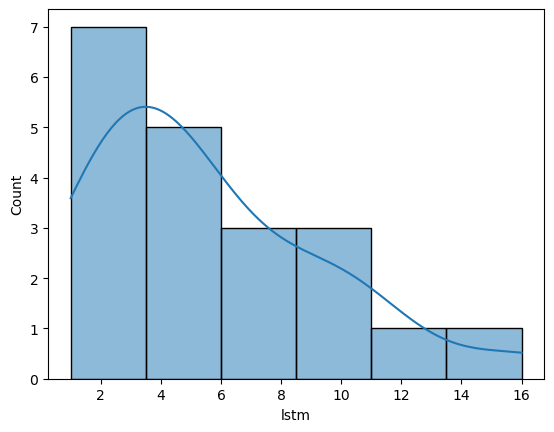

In [164]:
sns.histplot(data=dfs[2]['lstm'], kde=True)